In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Total cases in India
data = pd.read_csv('/content/state_level_latest1.csv')
data

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Recovery_rate,Mortality_rate
0,Total,343900,180326,9919,153612,16-06-20 10:44,43,TT,829,4,0,NaN,52.435592,2.884269
1,Maharashtra,110744,56049,4128,50554,15-06-20 22:19,13,MH,0,0,0,13 cases were marked as non-covid deaths in MH...,50.611320,3.727516
2,Tamil Nadu,46504,25344,479,20681,15-06-20 20:04,0,TN,0,0,0,2 deaths cross notified to other states from C...,54.498538,1.030019
3,Delhi,42829,16427,1400,25002,15-06-20 21:24,0,DL,0,0,0,"Delhi bulletins in the morning, containing dat...",38.354853,3.268813
4,Gujarat,24104,16672,1506,5926,15-06-20 21:56,0,GJ,0,0,0,NaN,69.166943,6.247926
5,Uttar Pradesh,14091,8610,417,5064,15-06-20 23:15,0,UP,0,0,0,NaN,61.102832,2.959336
6,Rajasthan,12981,9785,301,2895,15-06-20 22:12,0,RJ,0,0,0,NaN,75.379401,2.318774
7,Madhya Pradesh,10935,7903,465,2567,15-06-20 20:38,0,MP,0,0,0,NaN,72.272519,4.252401
8,West Bengal,11494,5494,485,5515,15-06-20 20:33,0,WB,0,0,0,NaN,47.798852,4.219593
9,State Unassigned,7684,0,0,7684,16-06-20 10:34,0,UN,712,0,0,MoHFW website reports that these are the 'case...,0.000000,0.000000


In [ ]:
data.columns

Index(['State', 'Confirmed', 'Recovered', 'Deaths', 'Active',
       'Last_Updated_Time', 'Migrated_Other', 'State_code', 'Delta_Confirmed',
       'Delta_Recovered', 'Delta_Deaths', 'State_Notes', 'Recovery_rate',
       'Mortality_rate'],
      dtype='object')

In [ ]:
data.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Recovery_rate,Mortality_rate
0,Total,343900,180326,9919,153612,16-06-20 10:44,43,TT,829,4,0,NaN,52.435592,2.884269
1,Maharashtra,110744,56049,4128,50554,15-06-20 22:19,13,MH,0,0,0,13 cases were marked as non-covid deaths in MH...,50.611320,3.727516
2,Tamil Nadu,46504,25344,479,20681,15-06-20 20:04,0,TN,0,0,0,2 deaths cross notified to other states from C...,54.498538,1.030019
3,Delhi,42829,16427,1400,25002,15-06-20 21:24,0,DL,0,0,0,"Delhi bulletins in the morning, containing dat...",38.354853,3.268813
4,Gujarat,24104,16672,1506,5926,15-06-20 21:56,0,GJ,0,0,0,NaN,69.166943,6.247926


In [ ]:
# Information about the cases file.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              38 non-null     object 
 1   Confirmed          38 non-null     int64  
 2   Recovered          38 non-null     int64  
 3   Deaths             38 non-null     int64  
 4   Active             38 non-null     int64  
 5   Last_Updated_Time  38 non-null     object 
 6   Migrated_Other     38 non-null     int64  
 7   State_code         38 non-null     object 
 8   Delta_Confirmed    38 non-null     int64  
 9   Delta_Recovered    38 non-null     int64  
 10  Delta_Deaths       38 non-null     int64  
 11  State_Notes        11 non-null     object 
 12  Recovery_rate      37 non-null     float64
 13  Mortality_rate     37 non-null     float64
dtypes: float64(2), int64(8), object(4)
memory usage: 4.3+ KB


In [ ]:
#Description about cases file.
data.describe()

,Confirmed,Recovered,Deaths,Active,Migrated_Other,Delta_Confirmed,Delta_Recovered,Delta_Deaths,Recovery_rate,Mortality_rate
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,37.000000,37.000000
mean,18100.000000,9490.842105,522.052632,8084.842105,2.263158,43.631579,0.210526,0.0,47.364811,1.444366
std,57810.309205,30218.225916,1726.706284,25967.416103,7.546913,175.031800,0.905177,0.0,22.733759,1.552909
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,390.250000,86.750000,0.250000,139.000000,0.000000,0.000000,0.000000,0.0,39.761249,0.091827
50%,2905.500000,1181.500000,11.500000,1083.000000,0.000000,0.000000,0.000000,0.0,51.396648,1.187739
75%,7712.500000,4204.500000,165.250000,2984.000000,0.000000,0.000000,0.000000,0.0,61.510791,2.272727
max,343900.000000,180326.000000,9919.000000,153612.000000,43.000000,829.000000,4.000000,0.0,84.313725,6.247926


In [ ]:
data.count()

State                38
Confirmed            38
Recovered            38
Deaths               38
Active               38
Last_Updated_Time    38
Migrated_Other       38
State_code           38
Delta_Confirmed      38
Delta_Recovered      38
Delta_Deaths         38
State_Notes          11
Recovery_rate        37
Mortality_rate       37
dtype: int64

**Checking missing values We can see there are some columns with missing values.**

In [ ]:
#total null values present in each column.
#null values means missing values
data.isnull().sum()

State                 0
Confirmed             0
Recovered             0
Deaths                0
Active                0
Last_Updated_Time     0
Migrated_Other        0
State_code            0
Delta_Confirmed       0
Delta_Recovered       0
Delta_Deaths          0
State_Notes          27
Recovery_rate         1
Mortality_rate        1
dtype: int64

**There are some covid 19 patients with no detected district details, so we replace the missing value with 'unknown'**

In [ ]:
state_new=data.loc[1:,['State','Confirmed','Recovered','Deaths','Active','Recovery_rate','Mortality_rate']]
state_new

,State,Confirmed,Recovered,Deaths,Active,Recovery_rate,Mortality_rate
1,Maharashtra,110744,56049,4128,50554,50.611320,3.727516
2,Tamil Nadu,46504,25344,479,20681,54.498538,1.030019
3,Delhi,42829,16427,1400,25002,38.354853,3.268813
4,Gujarat,24104,16672,1506,5926,69.166943,6.247926
5,Uttar Pradesh,14091,8610,417,5064,61.102832,2.959336
6,Rajasthan,12981,9785,301,2895,75.379401,2.318774
7,Madhya Pradesh,10935,7903,465,2567,72.272519,4.252401
8,West Bengal,11494,5494,485,5515,47.798852,4.219593
9,State Unassigned,7684,0,0,7684,0.000000,0.000000
10,Karnataka,7213,4140,89,2981,57.396368,1.233883


# Major affected State Covid-19 in India

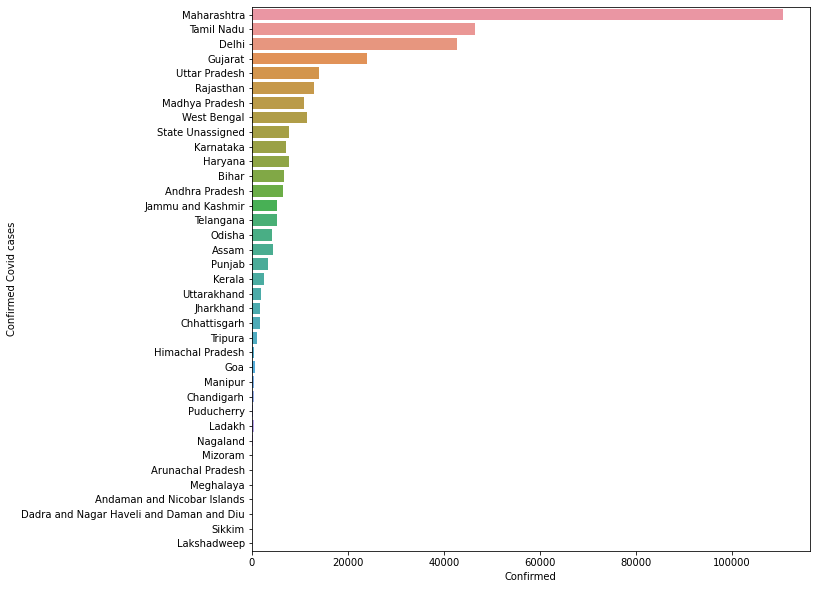

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(x = "Confirmed", y = "State", data=state_new);
plt.ylabel("Confirmed Covid cases");

Among the states Maharashtra and Tamilnadu has the highest number of covid cases reported.

In the case of Union Territories Delhi is in the top position with highest number of cases.

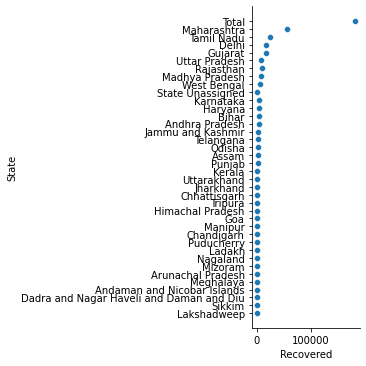

In [ ]:
sns.relplot(x="Recovered", y="State", data=data)

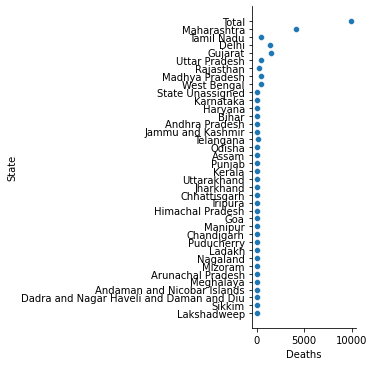

In [ ]:
sns.relplot(x="Deaths", y="State", data=data)

Text(0.5, 1.0, 'Current patient status')

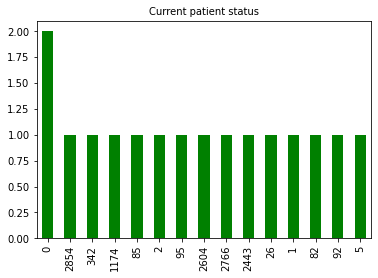

In [ ]:
# checking for top 10 affected areas/ Red zone
dataset['Recovered'].value_counts().head(15).plot(kind='bar', color='Green')

# plot for top seller
plt.title("Current patient status", fontsize=10)

# State VS Recovery Rate

Text(0, 0.5, 'Recovery Rate')

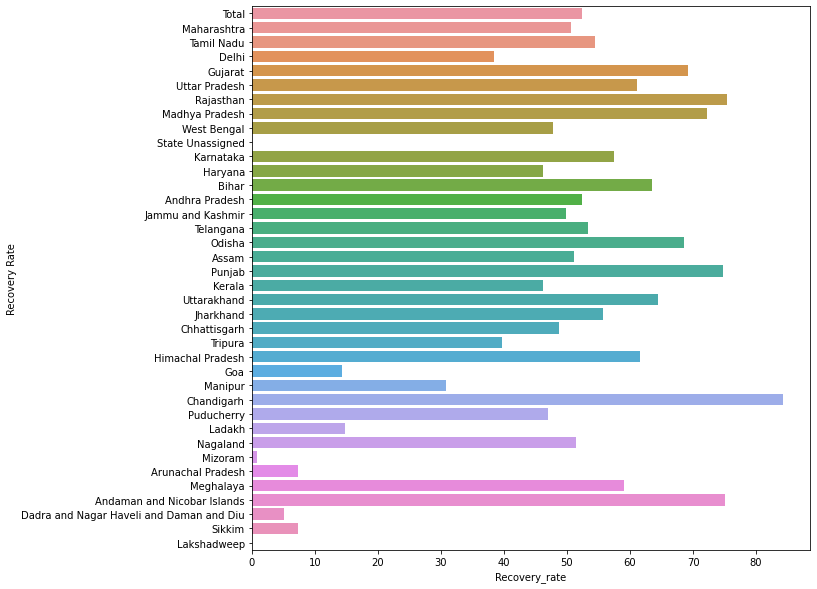

In [87]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'Recovery_rate', y = "State", data=data);
plt.ylabel("Recovery Rate")

The recovery rate is above 75 percentage in Chandigarh and Rajasthan Most of the states and Union Territories are fall under 45-65 percentage recovery rate Few states like Goa, Arunachal Predesh, Mizoram are with a recovery rate below 25 percentage

Text(0, 0.5, 'confirmed cases')

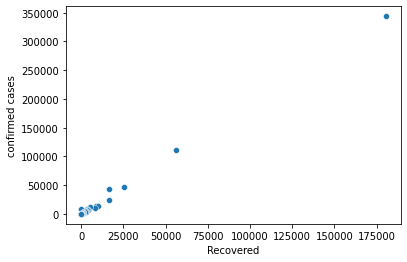

In [ ]:
sns.scatterplot(x='Recovered', y='Confirmed', data=data);
plt.ylabel("confirmed cases")

In [ ]:
#checking the column of cases file.
data.head(2)

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Recovery_rate,Mortality_rate
0,Total,343900,180326,9919,153612,16-06-20 10:44,43,TT,829,4,0,NaN,52.435592,2.884269
1,Maharashtra,110744,56049,4128,50554,15-06-20 22:19,13,MH,0,0,0,13 cases were marked as non-covid deaths in MH...,50.611320,3.727516


**Data Cleaning Before further analysis we will make copy of our data to avoid any changes in the original data during the cleaning process.**

In [ ]:
# Working dataset
dataset = data.copy()

In [ ]:
#calculating the sum of Active cases.
data.Active.sum()

307224

In [ ]:
#calculating the sum of Confirmed cases.
data.Confirmed.sum()

687800

In [ ]:
#calculating the sum of Recovered cases.
data.Recovered.sum()

360652

In [ ]:
#calculating the sum of Deaths cases.
data.Deaths.sum()

19838

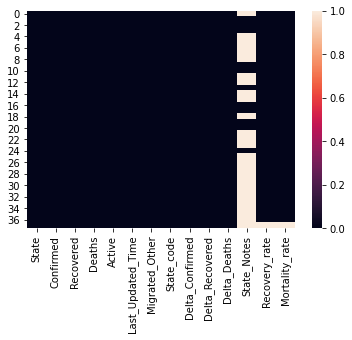

In [ ]:
sns.heatmap(data.isnull())
plt.show()

**Q.1) Show the number of Confirmed,Deaths and Recovered cases in each region.**

In [ ]:
data.groupby('State')['Confirmed'].sum().sort_values(ascending = False).head(10)

State
Total             343900
Maharashtra       110744
Tamil Nadu         46504
Delhi              42829
Gujarat            24104
Uttar Pradesh      14091
Rajasthan          12981
West Bengal        11494
Madhya Pradesh     10935
Haryana             7722
Name: Confirmed, dtype: int64

In [ ]:
data.groupby('State')['Confirmed','Deaths','Recovered'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths,Recovered
State,,,
Andaman and Nicobar Islands,44,0,33
Andhra Pradesh,6456,86,3385
Arunachal Pradesh,95,0,7
Assam,4310,8,2206
Bihar,6662,38,4226
Chandigarh,357,6,301
Chhattisgarh,1715,9,835
Dadra and Nagar Haveli and Daman and Diu,39,0,2
Delhi,42829,1400,16427


**Q.2) Removed all the records where Confirmed Cases is Less Than 50.**

In [ ]:
# To remove the records satisfying a particular condition.
data[data.Confirmed < 50]

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Recovery_rate,Mortality_rate
33,Meghalaya,44,26,1,17,14-06-20 9:41,0,ML,0,0,0,NaN,59.090909,2.272727
34,Andaman and Nicobar Islands,44,33,0,11,16-06-20 7:40,0,AN,3,0,0,NaN,75.000000,0.000000
35,Dadra and Nagar Haveli and Daman and Diu,39,2,0,37,16-06-20 6:15,0,DN,0,0,0,NaN,5.128205,0.000000
37,Lakshadweep,0,0,0,0,26-03-20 7:19,0,LD,0,0,0,NaN,NaN,NaN


**Q.3) In which State, maximum number of Confirmed cases were recorded ?**

In [ ]:
data.groupby('State').Confirmed.sum().sort_values(ascending = False).head(50)

State
Total                                       343900
Maharashtra                                 110744
Tamil Nadu                                   46504
Delhi                                        42829
Gujarat                                      24104
Uttar Pradesh                                14091
Rajasthan                                    12981
West Bengal                                  11494
Madhya Pradesh                               10935
Haryana                                       7722
State Unassigned                              7684
Karnataka                                     7213
Bihar                                         6662
Andhra Pradesh                                6456
Jammu and Kashmir                             5220
Telangana                                     5193
Assam                                         4310
Odisha                                        4163
Punjab                                        3267
Kerala                   

**Q.4) In which State, minimum number of Deaths cases were recorded ?**

In [ ]:
data.groupby('State').Deaths.sum().sort_values(ascending = True).head(50)

State
Andaman and Nicobar Islands                    0
State Unassigned                               0
Sikkim                                         0
Nagaland                                       0
Mizoram                                        0
Manipur                                        0
Goa                                            0
Lakshadweep                                    0
Arunachal Pradesh                              0
Dadra and Nagar Haveli and Daman and Diu       0
Meghalaya                                      1
Ladakh                                         1
Tripura                                        1
Puducherry                                     4
Chandigarh                                     6
Himachal Pradesh                               7
Assam                                          8
Jharkhand                                      9
Chhattisgarh                                   9
Odisha                                        14
Kerala        

**Q. 5) How many Confirmed, Deaths and Recovered cases were reported from  India till 26 June 2020?**

In [ ]:
data[data.State == 'Maharashtra']

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Recovery_rate,Mortality_rate
1,Maharashtra,110744,56049,4128,50554,15-06-20 22:19,13,MH,0,0,0,13 cases were marked as non-covid deaths in MH...,50.61132,3.727516


**Q.6) Sort the entire data wrt no. of Confirmed cases in ascending order.**

In [ ]:
#df.sort_values(by=['Confirmed'] , ascending = True)
data.sort_values(by = ['Confirmed'], ascending= True)

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Recovery_rate,Mortality_rate
37,Lakshadweep,0,0,0,0,26-03-20 7:19,0,LD,0,0,0,NaN,NaN,NaN
35,Dadra and Nagar Haveli and Daman and Diu,39,2,0,37,16-06-20 6:15,0,DN,0,0,0,NaN,5.128205,0.000000
34,Andaman and Nicobar Islands,44,33,0,11,16-06-20 7:40,0,AN,3,0,0,NaN,75.000000,0.000000
33,Meghalaya,44,26,1,17,14-06-20 9:41,0,ML,0,0,0,NaN,59.090909,2.272727
36,Sikkim,68,5,0,63,14-06-20 14:39,0,SK,0,0,0,NaN,7.352941,0.000000
32,Arunachal Pradesh,95,7,0,88,15-06-20 23:24,0,AR,0,0,0,NaN,7.368421,0.000000
31,Mizoram,121,1,0,120,16-06-20 7:28,0,MZ,4,0,0,NaN,0.826446,0.000000
30,Nagaland,179,92,0,87,16-06-20 9:09,0,NL,2,4,0,NaN,51.396648,0.000000
28,Puducherry,202,95,4,103,15-06-20 18:15,0,PY,0,0,0,NaN,47.029703,1.980198
27,Chandigarh,357,301,6,50,15-06-20 17:26,0,CH,0,0,0,NaN,84.313725,1.680672


In [ ]:
data.sort_values(by = ['Recovered'],ascending= False)

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Recovery_rate,Mortality_rate
0,Total,343900,180326,9919,153612,16-06-20 10:44,43,TT,829,4,0,NaN,52.435592,2.884269
1,Maharashtra,110744,56049,4128,50554,15-06-20 22:19,13,MH,0,0,0,13 cases were marked as non-covid deaths in MH...,50.611320,3.727516
2,Tamil Nadu,46504,25344,479,20681,15-06-20 20:04,0,TN,0,0,0,2 deaths cross notified to other states from C...,54.498538,1.030019
4,Gujarat,24104,16672,1506,5926,15-06-20 21:56,0,GJ,0,0,0,NaN,69.166943,6.247926
3,Delhi,42829,16427,1400,25002,15-06-20 21:24,0,DL,0,0,0,"Delhi bulletins in the morning, containing dat...",38.354853,3.268813
6,Rajasthan,12981,9785,301,2895,15-06-20 22:12,0,RJ,0,0,0,NaN,75.379401,2.318774
5,Uttar Pradesh,14091,8610,417,5064,15-06-20 23:15,0,UP,0,0,0,NaN,61.102832,2.959336
7,Madhya Pradesh,10935,7903,465,2567,15-06-20 20:38,0,MP,0,0,0,NaN,72.272519,4.252401
8,West Bengal,11494,5494,485,5515,15-06-20 20:33,0,WB,0,0,0,NaN,47.798852,4.219593
12,Bihar,6662,4226,38,2398,15-06-20 21:05,0,BR,0,0,0,NaN,63.434404,0.570399
